In [448]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

In [449]:
# Importing the dataset
dataset = pd.read_csv('bank.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [450]:
dataset.shape

(10000, 14)

In [451]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [452]:
# Checking for null values
dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [453]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [454]:
dataset.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

# **Feature Elimination**
#### Removing first 3 columns which are unique and will not add any value when training the model.
#### Removed columns (RowNumber, CustomerId and Surname and create a new dataframe)

In [455]:
df = dataset.iloc[:, 3:]

In [456]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Univariate analysis

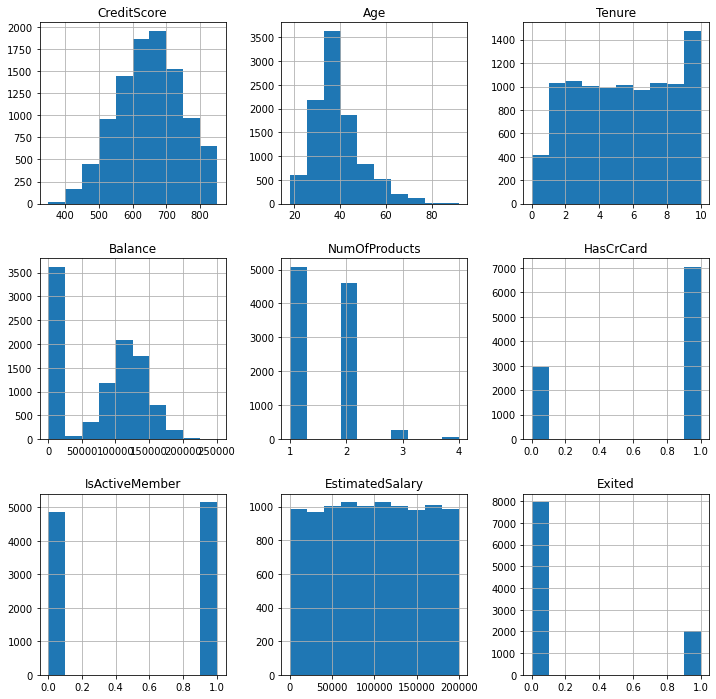

In [457]:
df.hist(figsize=(12,12),layout=(3,3));

#### Findings
There is no major skew or imbalance in the data that we need to rectify.

##### Performing one-hot encoding on 2 features (Geography (as there are only 3 unique values) and Gender)

In [458]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

## Checking for outliars

CreditScore


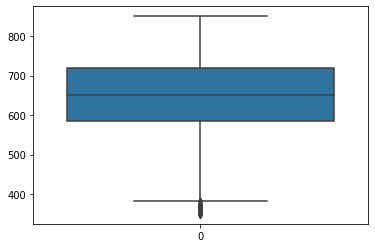

Age


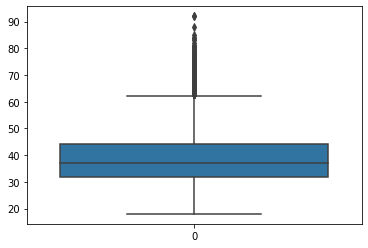

Tenure


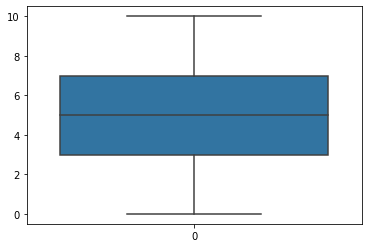

Balance


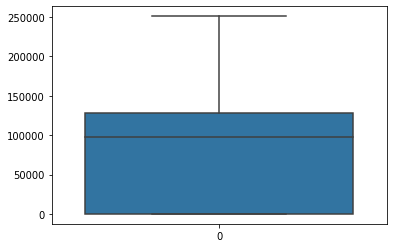

NumOfProducts


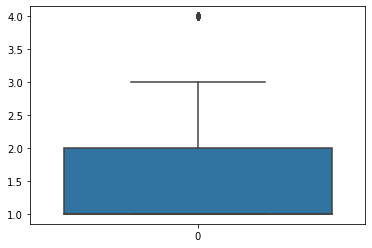

HasCrCard


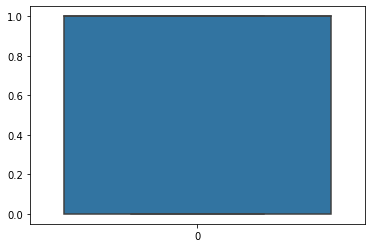

IsActiveMember


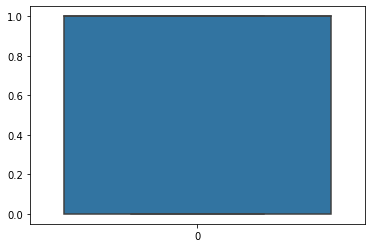

EstimatedSalary


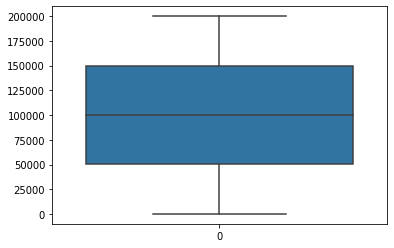

Exited


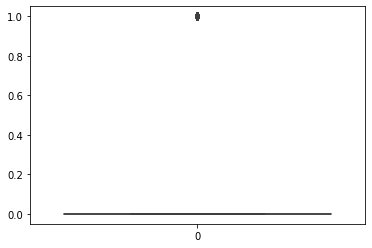

Geography_Germany


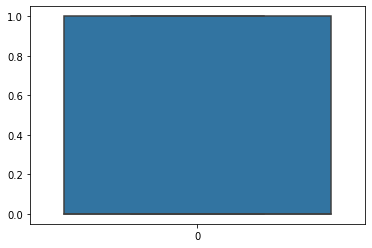

Geography_Spain


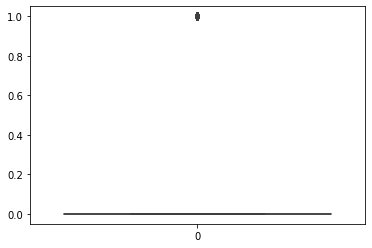

Gender_Male


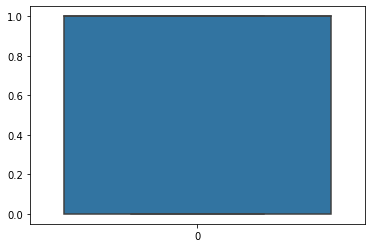

In [459]:
for col in df.columns:
  print(col)
  sns.boxplot(data=df[col])
  plt.show()

### Findings
No outliars present that need to be treated. Age is a variable that is expected to be spread out and having outliars is an expected occuring.
Also number of products could be 4 for an individual and the credit score for some individuals could be low.

# Bivariate analysis

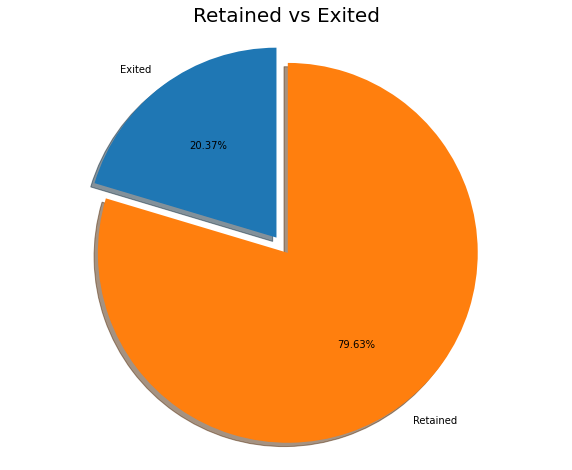

In [460]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Retained vs Exited", size = 20)
plt.show()

##### Given 20% is a small percentage of the whole the model should be able to predict the data from the minority class equally well or upscaling the data should be taken into consideration

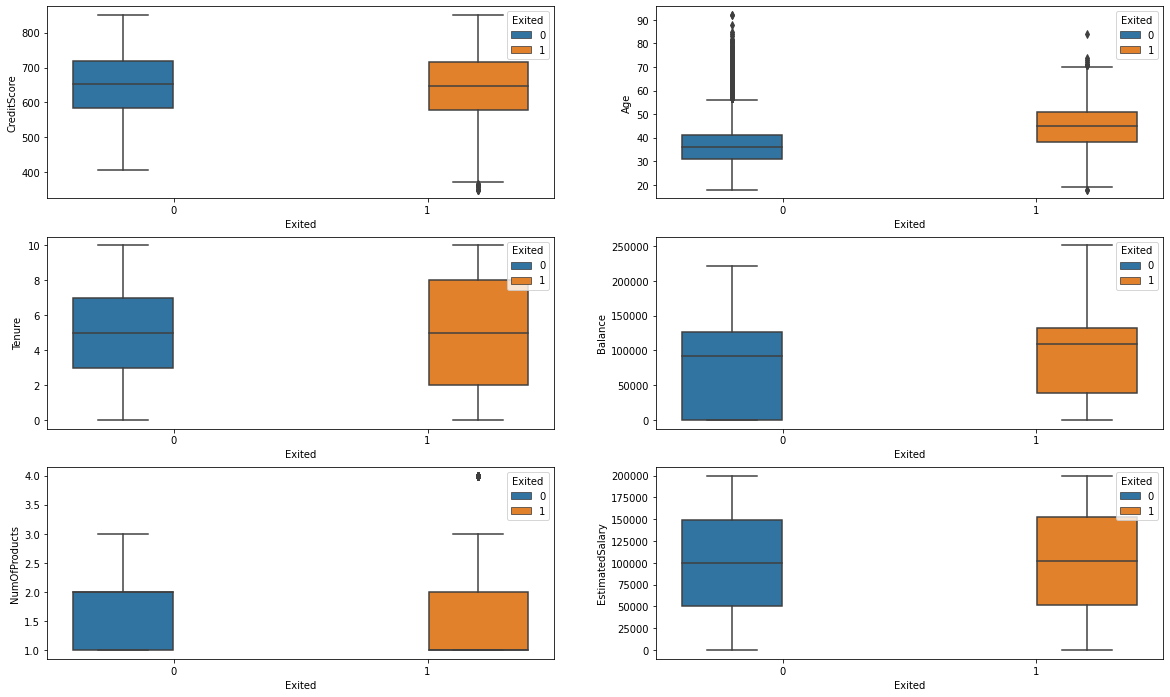

In [461]:
    # Relations based on the continuous data attributes
    fig, arr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=arr[0][0])
    sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=arr[0][1])
    sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=arr[1][0])
    sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=arr[1][1])
    sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=arr[2][0])
    sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=arr[2][1])

##### Nothing of significance can be concluded from the above
##### One thing of significance though is that the number of high balance customers are leaving the bank and this could be a cause of worry for the bank.

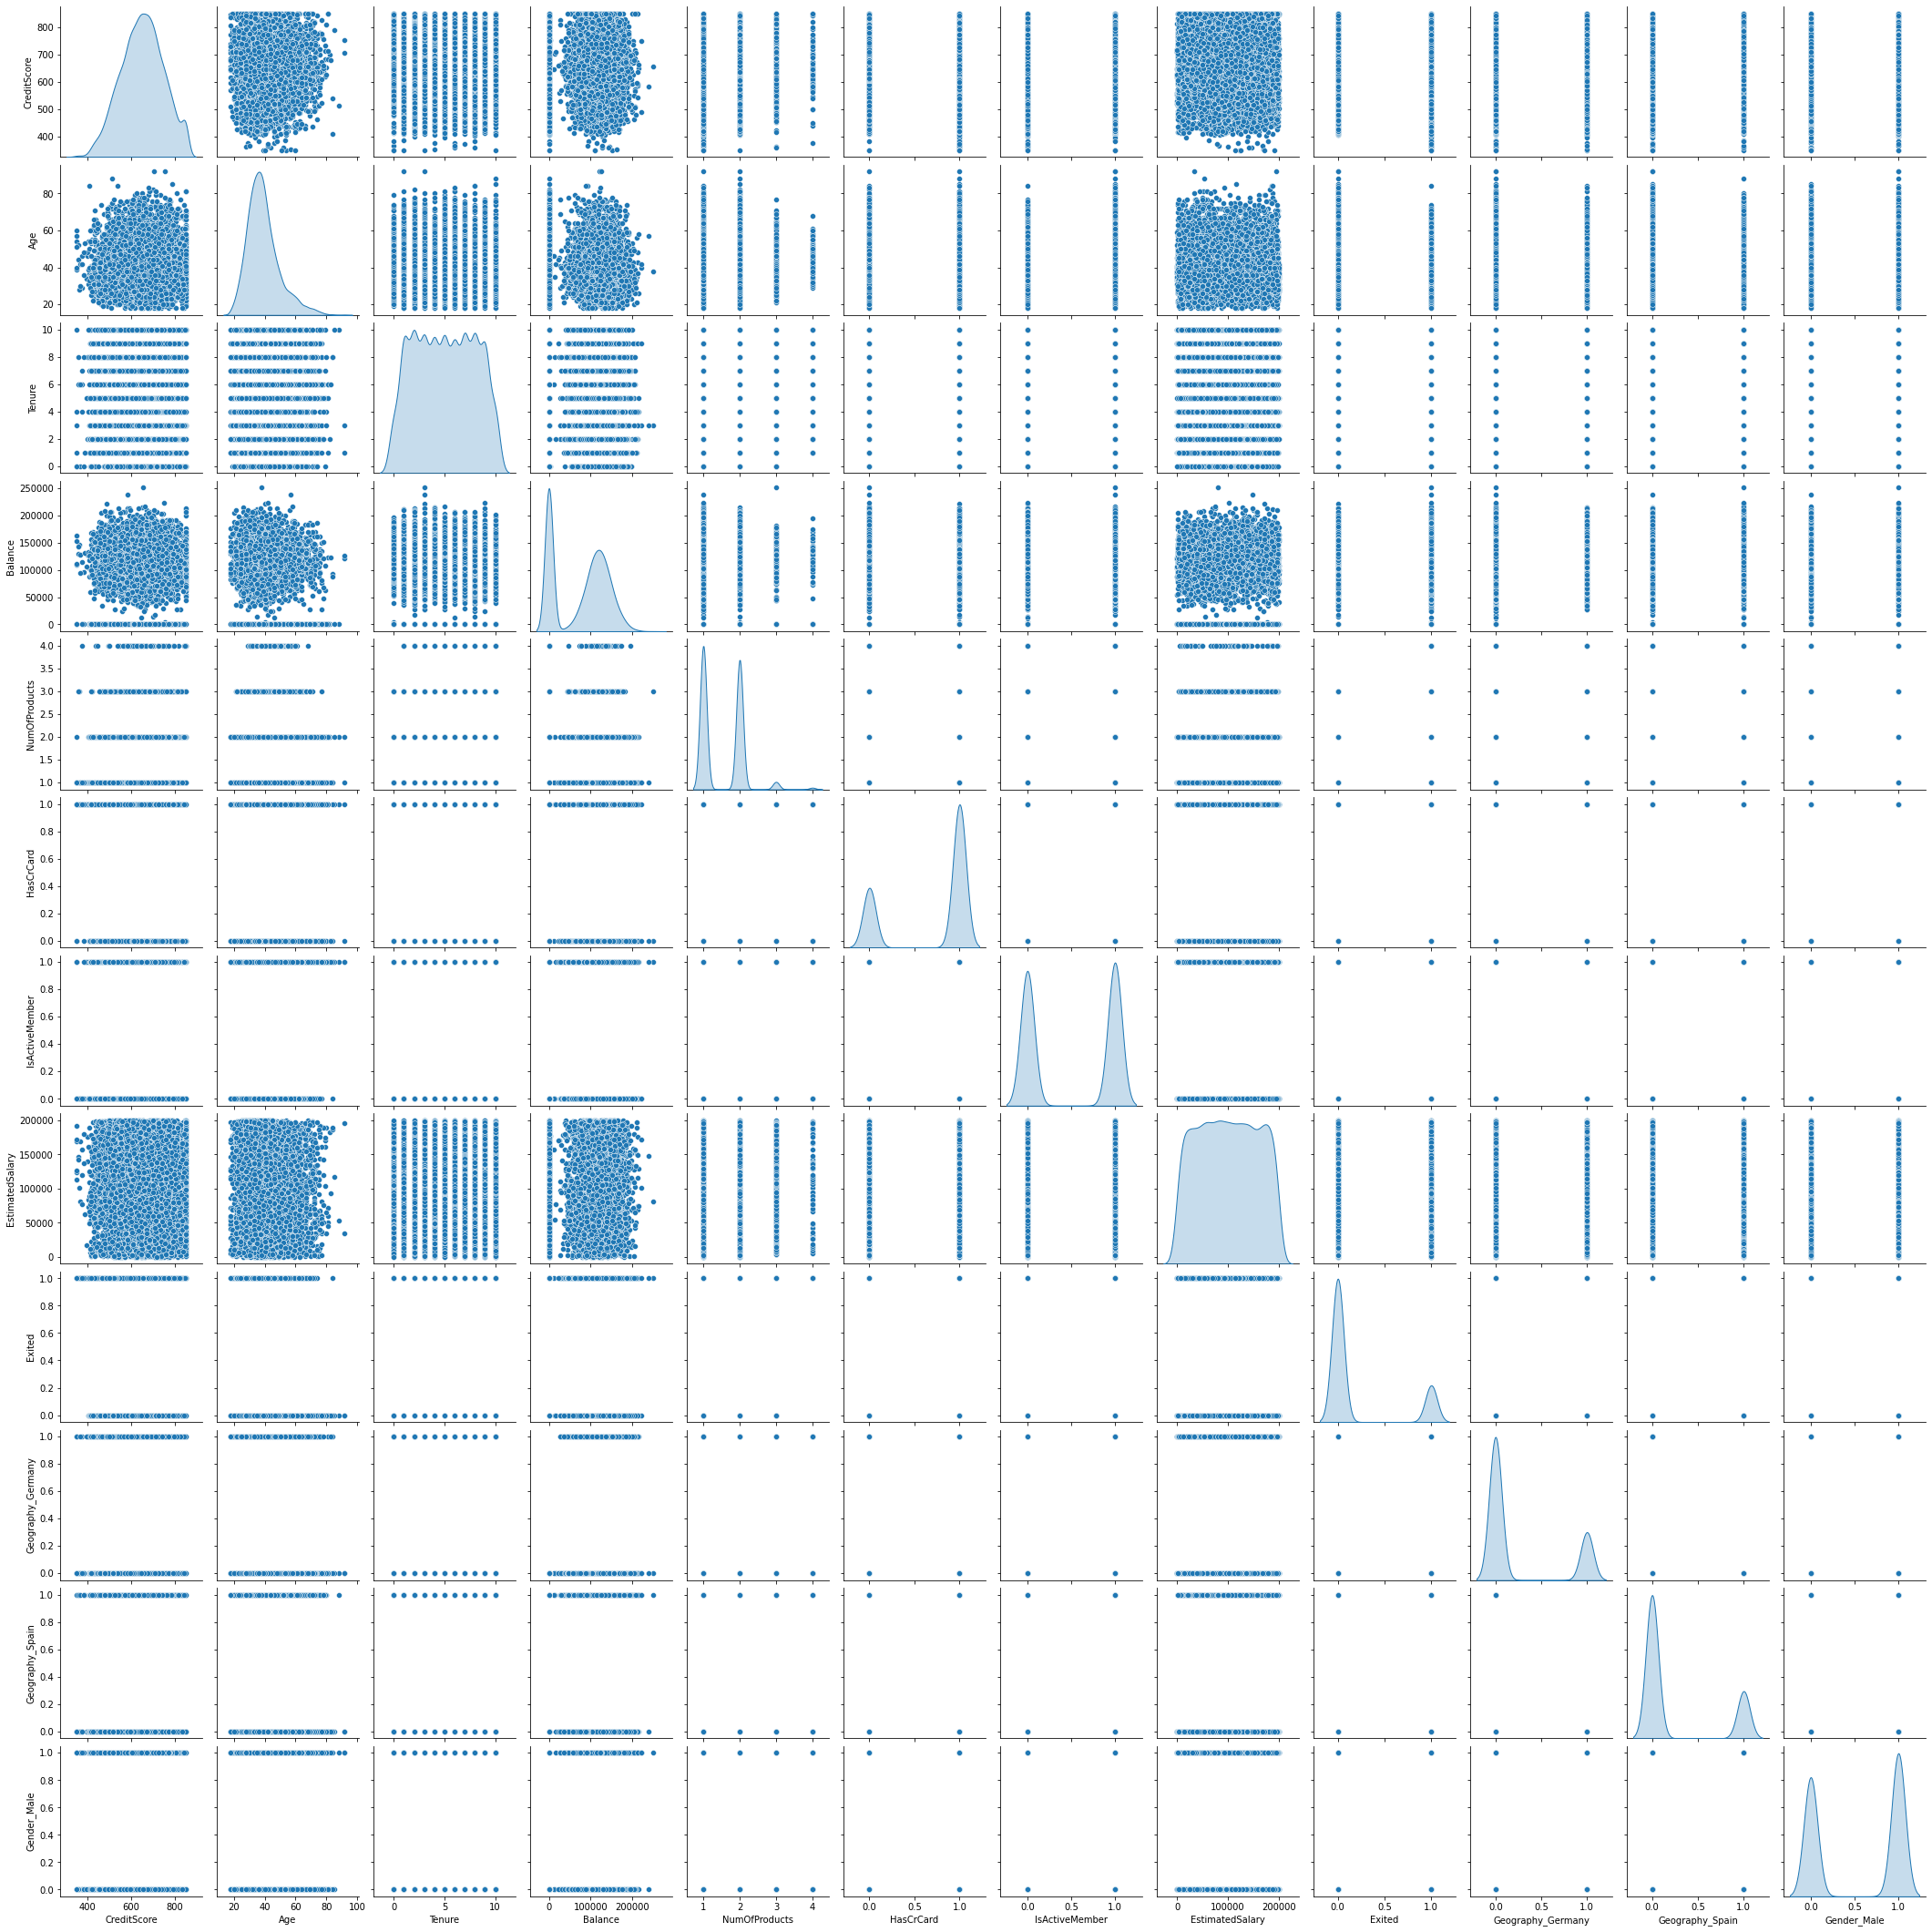

In [462]:
sns.pairplot(df, diag_kind='kde');

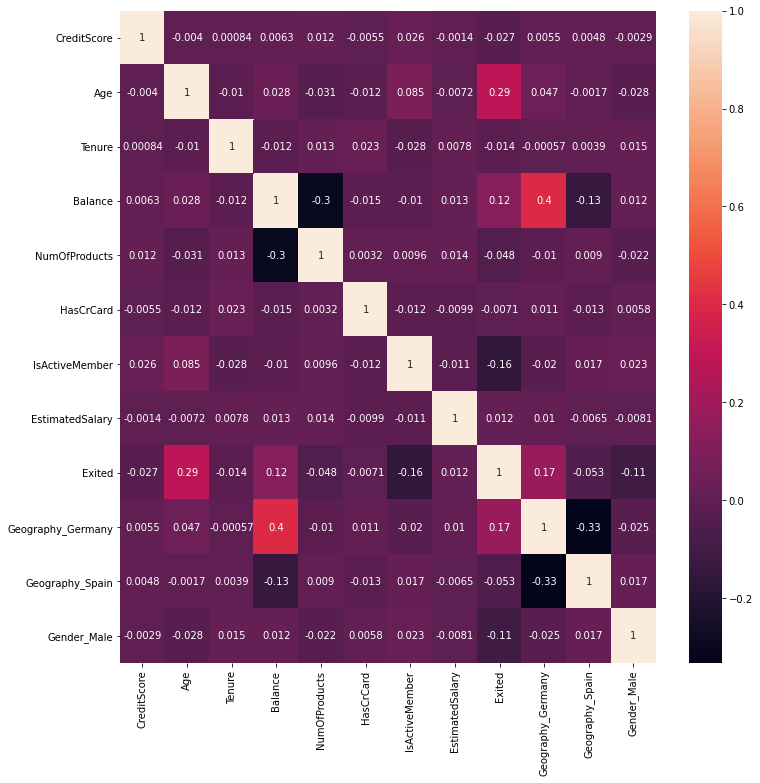

In [463]:
plt.figure(figsize=(12,12))
ax_map = sns.heatmap(df.iloc[:,:].corr(), annot=True)
ax_map.set_ylim(12.0, 0)
plt.show();

##### HasCrCard has the least correlation to the target variable, but others follow closely. No advantage eliminating HasCrCard at this juncture.

#  Performing Data Split

In [464]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
features = [col for col in df.columns if col != 'Exited' ]
target = ['Exited']
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size = 0.2, random_state = 42)

#**Normalization**

In [465]:
# Feature Scaling
# lots of high computation to ease calculation, we don't want one independent variable dominating
from sklearn.preprocessing import StandardScaler
sc = StandardScaler();
X_train = sc.fit_transform(X_train);
X_test = sc.transform(X_test);

# **Modelling**

In [466]:
# Setting-up ANN

# Importing the Keras libraries and package
# Sequential module - initialize neural network
# Dense - layers of ANN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, PReLU, ELU
from tensorflow.keras.optimizers import Adam, RMSprop

In [467]:
# Initialising the ANN
classifier = Sequential()

In [468]:
# Adding the input layer and the first hidden layer with dropout
# input_dim is necessary for the first layer as it was just initialized
classifier.add(Dense(50, input_dim = 11, kernel_initializer='he_uniform',activation='relu' ))

# Adding the Dropout layer
classifier.add(Dropout(0.08))
# Adding the hidden layer
classifier.add(Dense(25, kernel_initializer='he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid' ))

In [469]:
# Compiling the ANN - applying adam to whole ANN
# binary_crossentropy, accuracy
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [470]:
# Applying ReduceLROnPlateau callback to help reduce learning rate if plateau is hit on loss
from keras.callbacks import ReduceLROnPlateau
callback = ReduceLROnPlateau(monitor='loss', factor=0.001, patience=2, verbose=1, min_delta=1e-4, mode='min')

In [471]:
# Fitting the ANN to the Training Set
# X_train, y_train, Batch size, Epochs (whole training set)
model_history = classifier.fit(X_train, y_train, epochs=150, batch_size=10, callbacks=callback)

Epoch 1/150
800/800 [==============================] - 1s 906us/step - loss: 0.5605 - accuracy: 0.7344
Epoch 2/150
800/800 [==============================] - 1s 881us/step - loss: 0.4314 - accuracy: 0.8183
Epoch 3/150
800/800 [==============================] - 1s 917us/step - loss: 0.4090 - accuracy: 0.8286
Epoch 4/150
800/800 [==============================] - 1s 927us/step - loss: 0.3917 - accuracy: 0.8423
Epoch 5/150
800/800 [==============================] - 1s 957us/step - loss: 0.3920 - accuracy: 0.8441
Epoch 6/150
800/800 [==============================] - 1s 972us/step - loss: 0.3805 - accuracy: 0.8481
Epoch 7/150
800/800 [==============================] - 1s 943us/step - loss: 0.3736 - accuracy: 0.8544
Epoch 8/150
800/800 [==============================] - 1s 950us/step - loss: 0.3719 - accuracy: 0.8526
Epoch 9/150
800/800 [==============================] - 1s 940us/step - loss: 0.3709 - accuracy: 0.8518
Epoch 10/150
800/800 [==============================] - 1s 963us/step - l

# Prediction at 0.5 Threshold

In [472]:
Y_pred = (classifier.predict(X_test) > 0.5).astype("int32")

# Model Performance Evaluation

In [473]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [474]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_pred,y_test)
print(f'Test score is {score}')

Test score is 0.8615


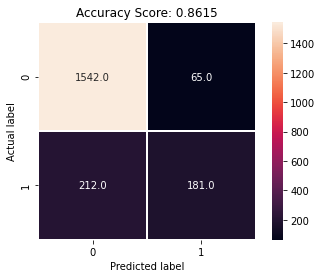

In [475]:
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.3, 
        square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()

### Conclusion: The accuracy of the model is fair, Changing the hyperparameters has resulted in altering the score 85.5 +- 0.5. The data points in my opinion are very less (10000), had there been more data I think the accuracy would be much higher.

# Trying hyperparameter tuning to see if it makes significant difference but I suspect the changes will not be a lot.

In [476]:
## Perform Hyperparameter Optimization

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

In [477]:
def build_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.1))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.1))
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [478]:
layers = [(10), (20, 10), (30, 15), (45, 30, 15)]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30, 60, 80, 100 ,150])

In [479]:
model = KerasClassifier(build_fn=build_model, verbose=0)

In [480]:
GridSearch = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [481]:
grid_results = GridSearch.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'int' object is not iterable

  FitFailedWarning)


In [482]:
[grid_results.best_score_,grid_results.best_params_]

[0.8617500066757202,
 {'activation': 'relu', 'batch_size': 128, 'epochs': 150, 'layers': (30, 15)}]

In [483]:
print(f'Train accuracy is {accuracy_score(grid_results.predict(X_test),y_test)}')

Train accuracy is 0.8685


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


##### Post GridSearchCV we see that the output accuracy has not increase a lot. Hence we see that if the number of datapoints are increased the accuracy, precision and recall will improve. With the data set currently available we will be able to get an accuracy of approximately 86%.